# 신용카드 사용자 신용도 예측
- 변수 설명


- family_type: 결혼 여부
    - ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
- house_type: 생활 방식
    - ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']
- DAYS_BIRTH: 출생일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

- DAYS_EMPLOYED: 업무 시작일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미, 양수 값은 고용되지 않은 상태를 의미함
- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형										
- family_size: 가족 규모
- begin_month: 신용카드 발급 월
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
    - 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/mnt/')

Mounted at /content/mnt/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
train = pd.read_csv('/content/mnt/MyDrive/Project/data/train.csv')

In [ ]:
test = pd.read_csv('/content/mnt/MyDrive/Project/data/test.csv')

## EDA

In [ ]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

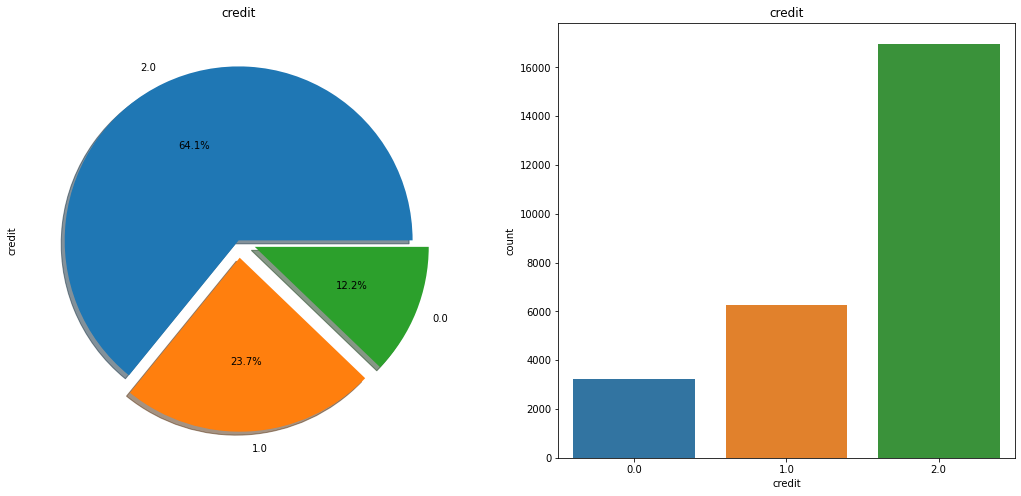

In [ ]:
# credit 비율
f, ax = plt.subplots(1, 2, figsize=(18,8))
train['credit'].value_counts().plot.pie(explode=[0,0.1, 0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('credit')
ax[0].set_ylabel('credit')
sns.countplot('credit',data=train,ax=ax[1])
ax[1].set_title('credit')
plt.show()

In [ ]:
# 데이터 타입 파악
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

- 변수별 신용도 EDA

- 성별

In [ ]:
train.groupby(['gender'])['credit'].count()

gender
F    17697
M     8760
Name: credit, dtype: int64

In [ ]:
train.groupby(['gender', 'credit'])['credit'].count()

gender  credit
F       0.0        2148
        1.0        4220
        2.0       11329
M       0.0        1074
        1.0        2047
        2.0        5639
Name: credit, dtype: int64

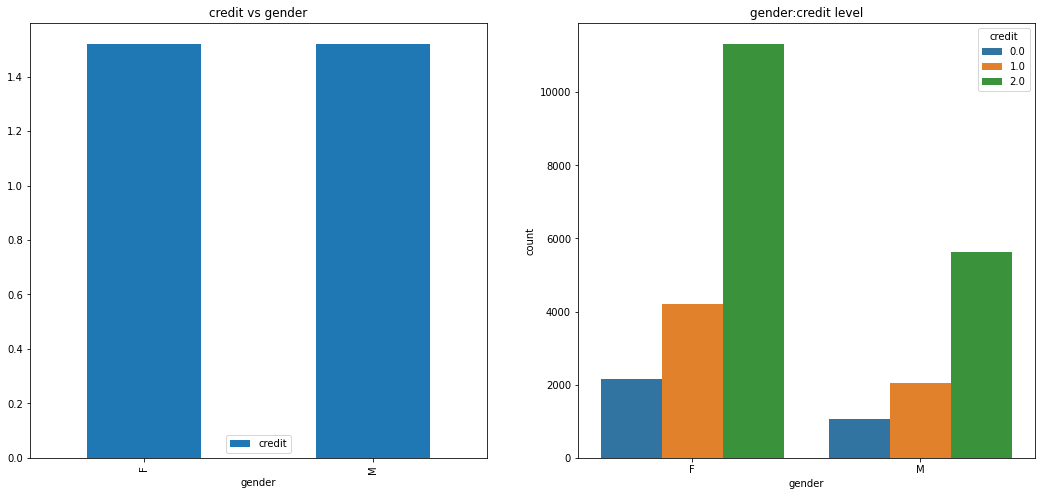

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['gender','credit']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs gender')
sns.countplot('gender',hue='credit', data=train,ax=ax[1])
ax[1].set_title('gender:credit level')
plt.show()

# 오른쪽 그래프를 보면 마치 여성들이 연체율이 높다는 것처럼 보이나 사실 전체적인 데이터 비율에서 남성과 여성이 차이가 없으며,  
# 여성이 수집된 데이터량이 2배 더 많고, 신용점수별로 결과 값 또한 약 2배 차이남을 볼 수 있습니다.

In [ ]:
pd.crosstab(train.credit,train.gender,margins=True).style.background_gradient(cmap='summer_r')

gender,F,M,All
credit,,,
0.0,2148,1074,3222
1.0,4220,2047,6267
2.0,11329,5639,16968
All,17697,8760,26457


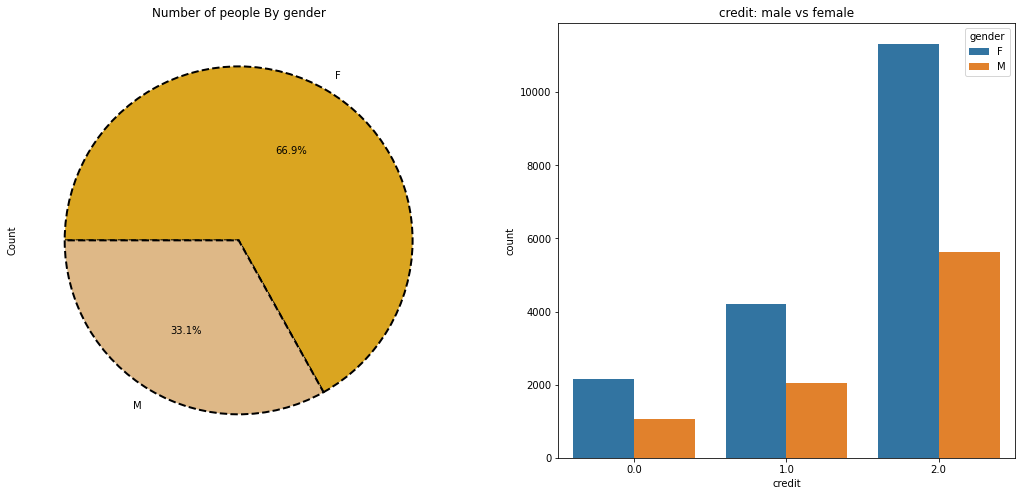

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
# train['gender'].value_counts().plot.bar(ax=ax[0])
df1= train.groupby('gender').count()['index']
f.set_facecolor('white')
ax[0].pie(df1, labels=df1.index,colors=['goldenrod','burlywood'], startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':2})

ax[0].set_title('Number of people By gender')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='gender',data=train,ax=ax[1])
ax[1].set_title('credit: male vs female')
plt.show()

- 차량 여부

In [ ]:
train.groupby(['car'])['credit'].count()

car
N    16410
Y    10047
Name: credit, dtype: int64

In [ ]:
train.groupby(['car', 'credit'])['credit'].count()

car  credit
N    0.0        1982
     1.0        3990
     2.0       10438
Y    0.0        1240
     1.0        2277
     2.0        6530
Name: credit, dtype: int64

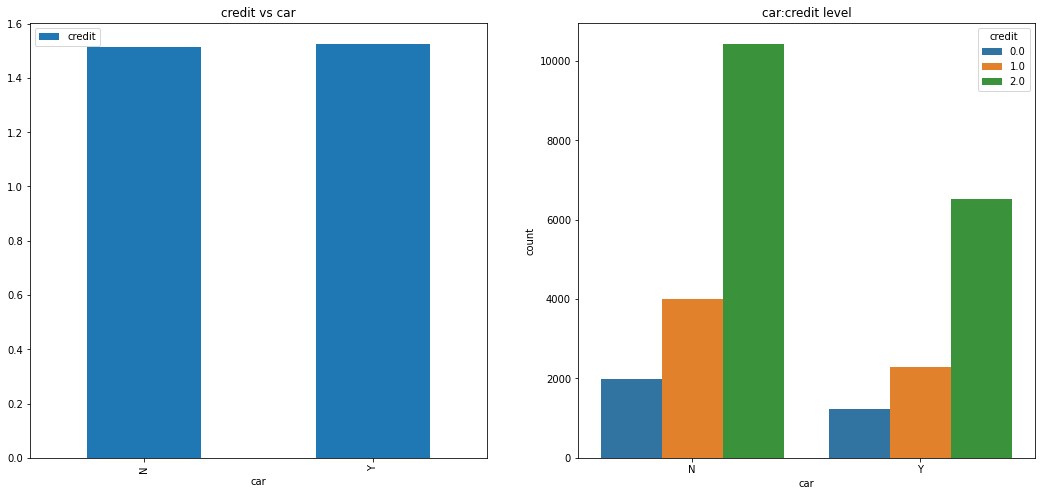

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['car','credit']].groupby(['car']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs car')
sns.countplot('car',hue='credit',data=train,ax=ax[1])
ax[1].set_title('car:credit level')
plt.show()

In [ ]:
pd.crosstab(train.credit,train.car,margins=True).style.background_gradient(cmap='summer_r')

car,N,Y,All
credit,,,
0.0,1982,1240,3222
1.0,3990,2277,6267
2.0,10438,6530,16968
All,16410,10047,26457


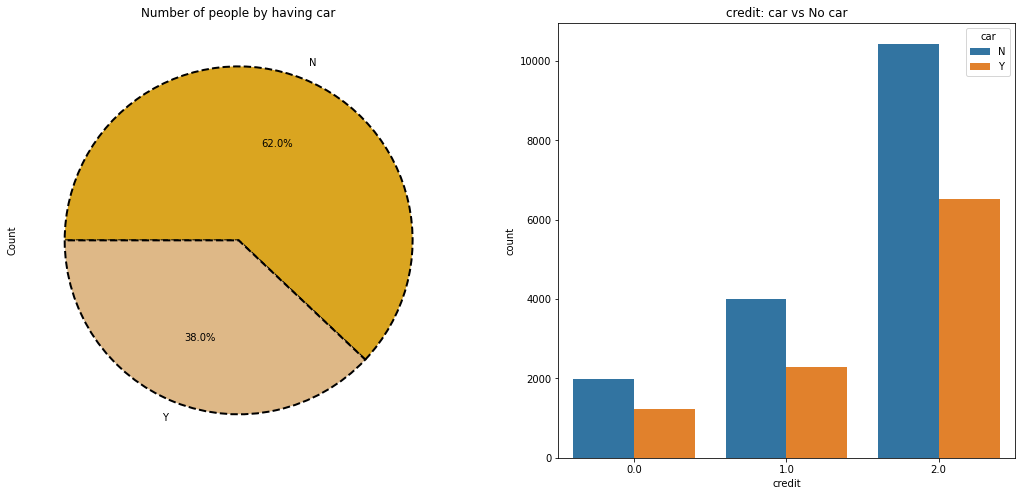

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
# train['car'].value_counts().plot.bar(ax=ax[0])
df1= train.groupby('car').count()['index']
f.set_facecolor('white')
ax[0].pie(df1, labels=df1.index,colors=['goldenrod','burlywood'], startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':2})


ax[0].set_title('Number of people by having car')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='car',data=train,ax=ax[1])
ax[1].set_title('credit: car vs No car')
plt.show()

# 차량 여부에 따른 신용도 또한 모든 비율이 비슷한 비율을 보이고 있어 뚜렷하게 구별되는 변수인지는 알 수 없음.

- 부동산

In [ ]:
train.groupby(['reality'])['credit'].count()

reality
N     8627
Y    17830
Name: credit, dtype: int64

In [ ]:
train.groupby(['reality', 'credit'])['credit'].count()

reality  credit
N        0.0        1064
         1.0        1935
         2.0        5628
Y        0.0        2158
         1.0        4332
         2.0       11340
Name: credit, dtype: int64

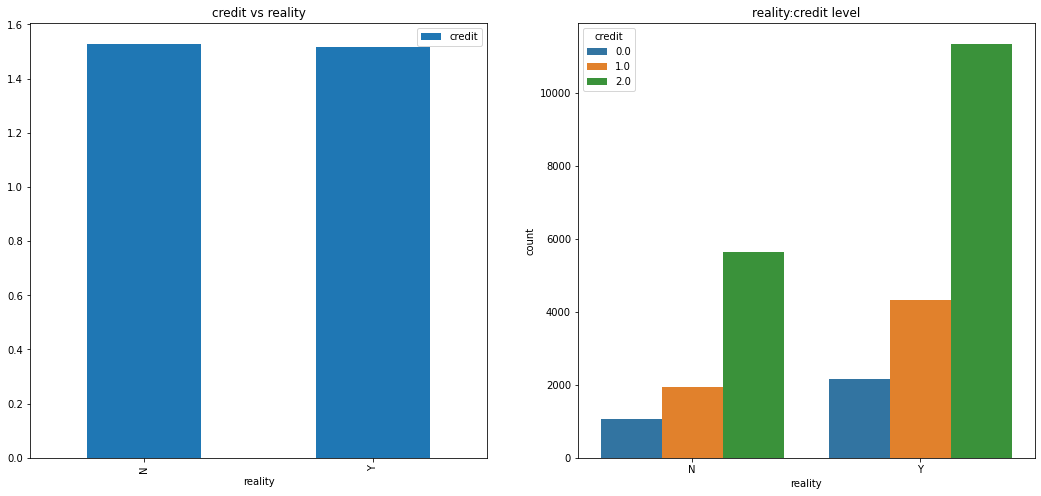

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['reality','credit']].groupby(['reality']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs reality')
sns.countplot('reality',hue='credit',data=train,ax=ax[1])
ax[1].set_title('reality:credit level')
plt.show()

In [ ]:
pd.crosstab(train.credit,train.reality,margins=True).style.background_gradient(cmap='summer_r')

reality,N,Y,All
credit,,,
0.0,1064,2158,3222
1.0,1935,4332,6267
2.0,5628,11340,16968
All,8627,17830,26457


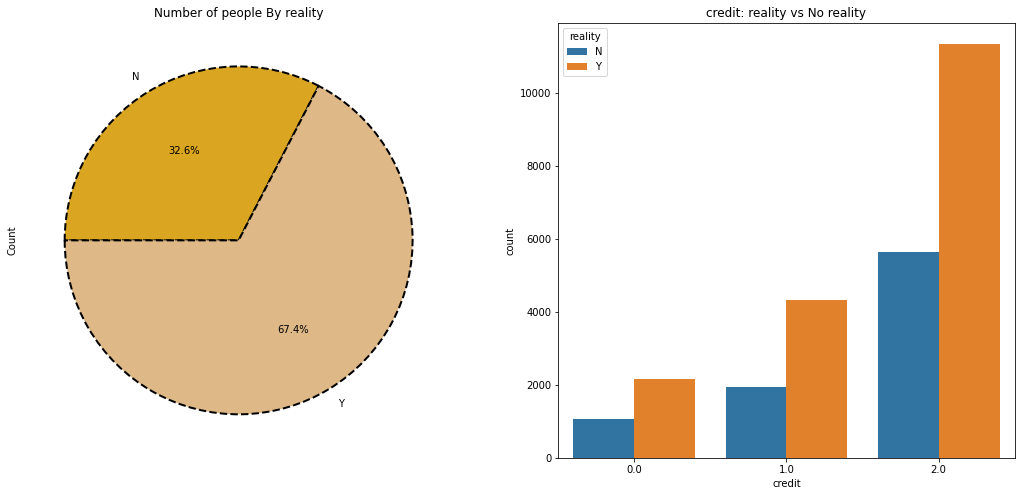

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
# train['reality'].value_counts().plot.bar(ax=ax[0])
df1= train.groupby('reality').count()['index']
f.set_facecolor('white')
ax[0].pie(df1, labels=df1.index,colors=['goldenrod','burlywood'], startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':2})

ax[0].set_title('Number of people By reality')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='reality',data=train,ax=ax[1])
ax[1].set_title('credit: reality vs No reality')
plt.show()

- 결혼 여부

In [ ]:
train.groupby(['family_type'])['credit'].count()

family_type
Civil marriage           2123
Married                 18196
Separated                1539
Single / not married     3496
Widow                    1103
Name: credit, dtype: int64

In [ ]:
train.family_type

0                     Married
1              Civil marriage
2                     Married
3                     Married
4                     Married
                 ...         
26452                 Married
26453               Separated
26454          Civil marriage
26455    Single / not married
26456          Civil marriage
Name: family_type, Length: 26457, dtype: object

In [ ]:
# Civil marriage와 Married를 합침
train['family_type'][train.family_type=='Civil marriage'] = 'Married'
test['family_type'][test.family_type=='Civil marriage'] = 'Married'

In [ ]:
train.groupby(['family_type'])['credit'].count()

family_type
Married                 20319
Separated                1539
Single / not married     3496
Widow                    1103
Name: credit, dtype: int64

In [ ]:
train.groupby(['family_type', 'credit'])['credit'].count()

family_type           credit
Married               0.0        2501
                      1.0        4679
                      2.0       13139
Separated             0.0         193
                      1.0         349
                      2.0         997
Single / not married  0.0         402
                      1.0         940
                      2.0        2154
Widow                 0.0         126
                      1.0         299
                      2.0         678
Name: credit, dtype: int64

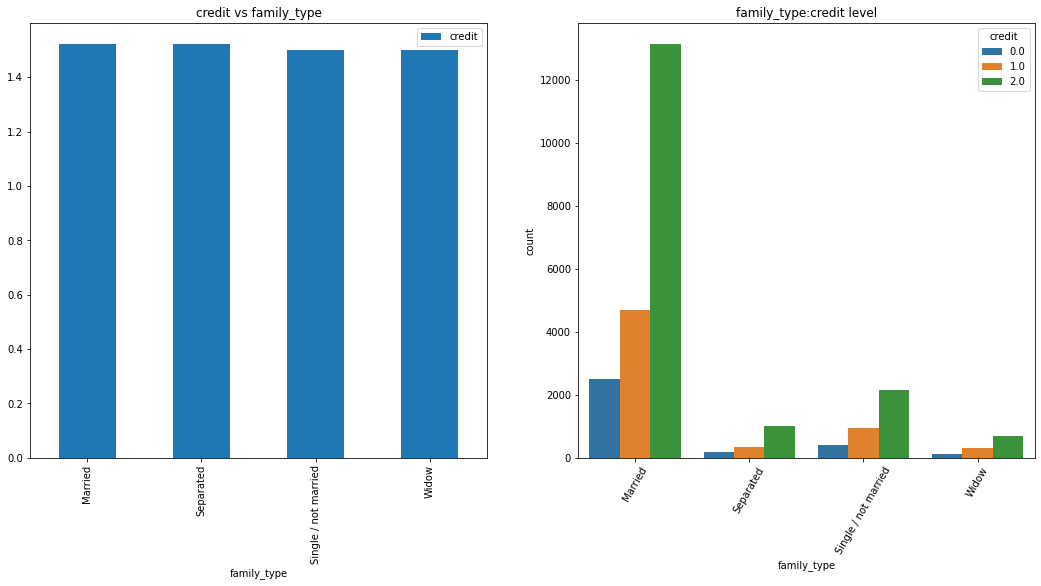

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['family_type','credit']].groupby(['family_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs family_type')
sns.countplot('family_type',hue='credit',data=train,ax=ax[1])
ax[1].set_title('family_type:credit level')
plt.xticks(rotation=60)
plt.show()

# 가족 구성에 따라서 약간의 차이가 있음.

In [ ]:
pd.crosstab(train.credit,train.family_type,margins=True).style.background_gradient(cmap='summer_r')

family_type,Married,Separated,Single / not married,Widow,All
credit,,,,,
0.0,2501,193,402,126,3222
1.0,4679,349,940,299,6267
2.0,13139,997,2154,678,16968
All,20319,1539,3496,1103,26457


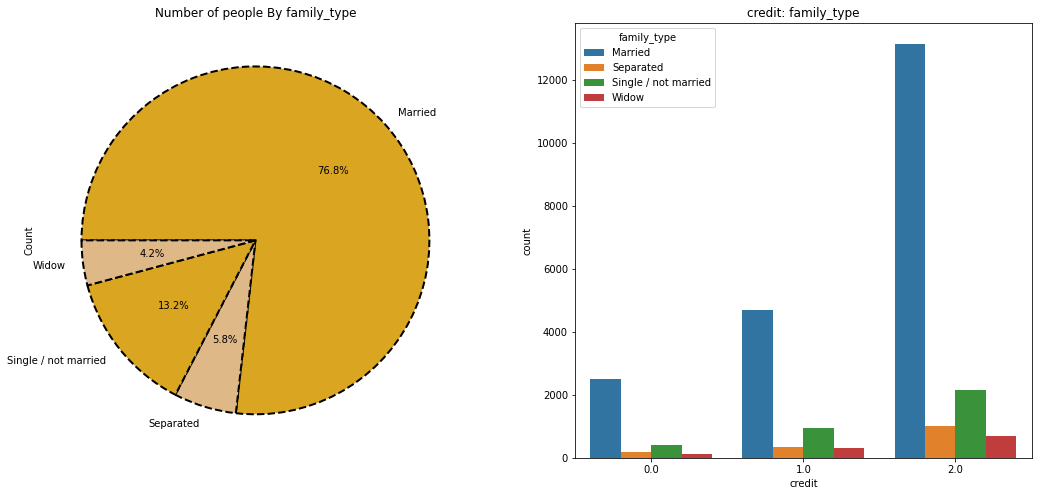

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
# train['family_type'].value_counts().plot.bar(ax=ax[0])
df1= train.groupby('family_type').count()['index']
f.set_facecolor('white')
ax[0].pie(df1, labels=df1.index,colors=['goldenrod','burlywood'], startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':2})


ax[0].set_title('Number of people By family_type')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='family_type',data=train,ax=ax[1])
ax[1].set_title('credit: family_type')
plt.show()

- 소득 분류

In [ ]:
train.groupby(['income_type'])['credit'].count()

income_type
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Working                 13645
Name: credit, dtype: int64

In [ ]:
train.groupby(['income_type', 'credit'])['credit'].count()

income_type           credit
Commercial associate  0.0        782
                      1.0       1344
                      2.0       4076
Pensioner             0.0        536
                      1.0       1084
                      2.0       2829
State servant         0.0        265
                      1.0        489
                      2.0       1400
Student               1.0          3
                      2.0          4
Working               0.0       1639
                      1.0       3347
                      2.0       8659
Name: credit, dtype: int64

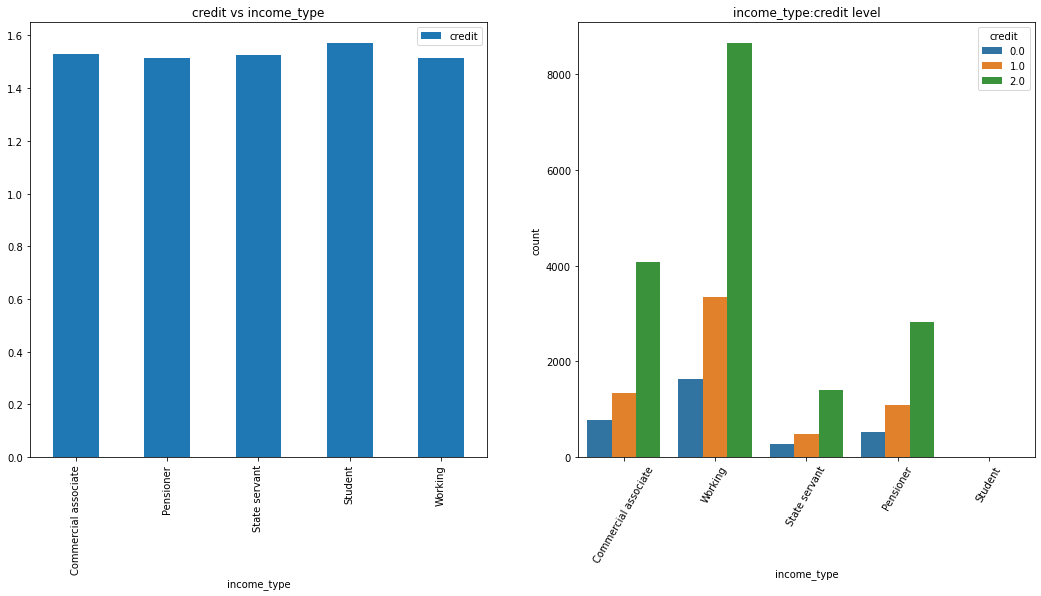

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['income_type','credit']].groupby(['income_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs income_type')
sns.countplot('income_type',hue='credit',data=train,ax=ax[1])
ax[1].set_title('income_type:credit level')
plt.xticks(rotation=60)
plt.show()

# 여기서도 큰 차이를 발견하지 못함.
# Student의 경우 카드를 만드는 경우가 적어 분포의 차이를 반영하는 것에 의문이 있음.

In [ ]:
pd.crosstab(train.credit,train.income_type,margins=True).style.background_gradient(cmap='summer_r')

income_type,Commercial associate,Pensioner,State servant,Student,Working,All
credit,,,,,,
0.0,782,536,265,0,1639,3222
1.0,1344,1084,489,3,3347,6267
2.0,4076,2829,1400,4,8659,16968
All,6202,4449,2154,7,13645,26457


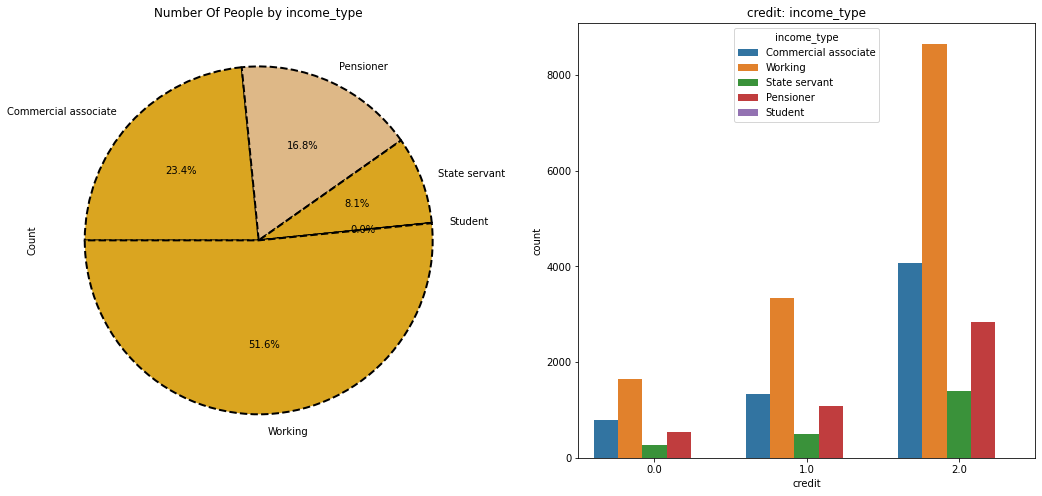

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
# train['income_type'].value_counts().plot.bar(ax=ax[0])
df1= train.groupby('income_type').count()['index']
f.set_facecolor('white')
ax[0].pie(df1, labels=df1.index,colors=['goldenrod','burlywood'], startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':2})

ax[0].set_title('Number Of People by income_type')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='income_type',data=train,ax=ax[1])
ax[1].set_title('credit: income_type')
plt.show()

- 직업

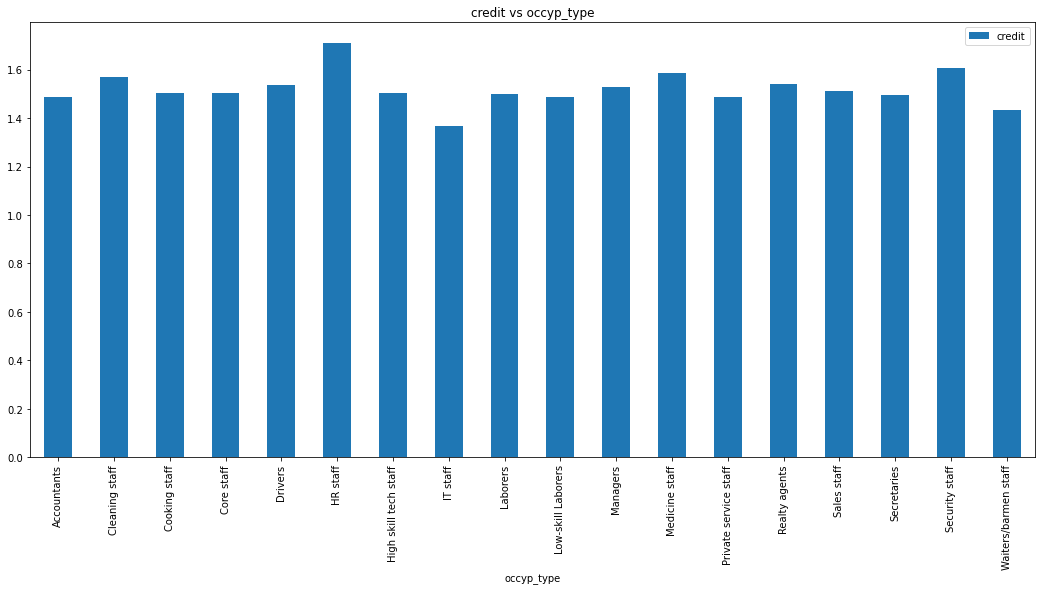

In [ ]:
f,ax = plt.subplots(1,1,figsize=(18,8))
train[['occyp_type','credit']].groupby(['occyp_type']).mean().plot.bar(ax=ax)
plt.title('credit vs occyp_type')
plt.show()

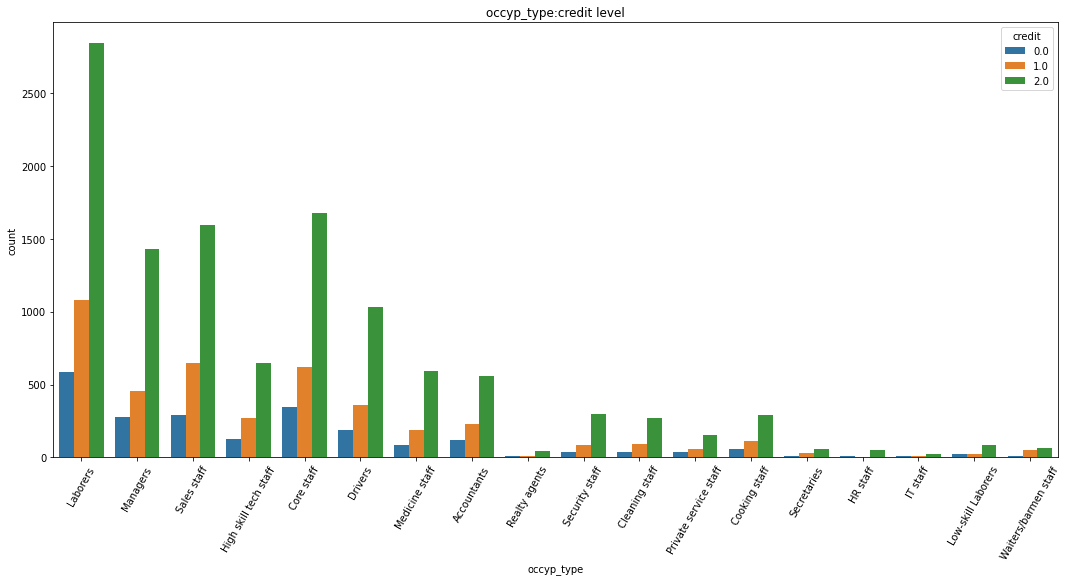

In [ ]:
f,ax=plt.subplots(1,1,figsize=(18,8))
sns.countplot('occyp_type',hue='credit',data=train,ax=ax)
plt.title('occyp_type:credit level')
plt.xticks(rotation=60)
plt.show()

# 직업별로 신용도에 대한 비율은 조금 차이가 있어 보임.

- 교육 수준

In [ ]:
pd.crosstab(train.edu_type,train.credit,margins=True).style.background_gradient(cmap='summer_r')

credit,0.0,1.0,2.0,All
edu_type,,,,
Academic degree,2,7,14,23
Higher education,909,1751,4502,7162
Incomplete higher,114,246,660,1020
Lower secondary,28,59,170,257
Secondary / secondary special,2169,4204,11622,17995
All,3222,6267,16968,26457


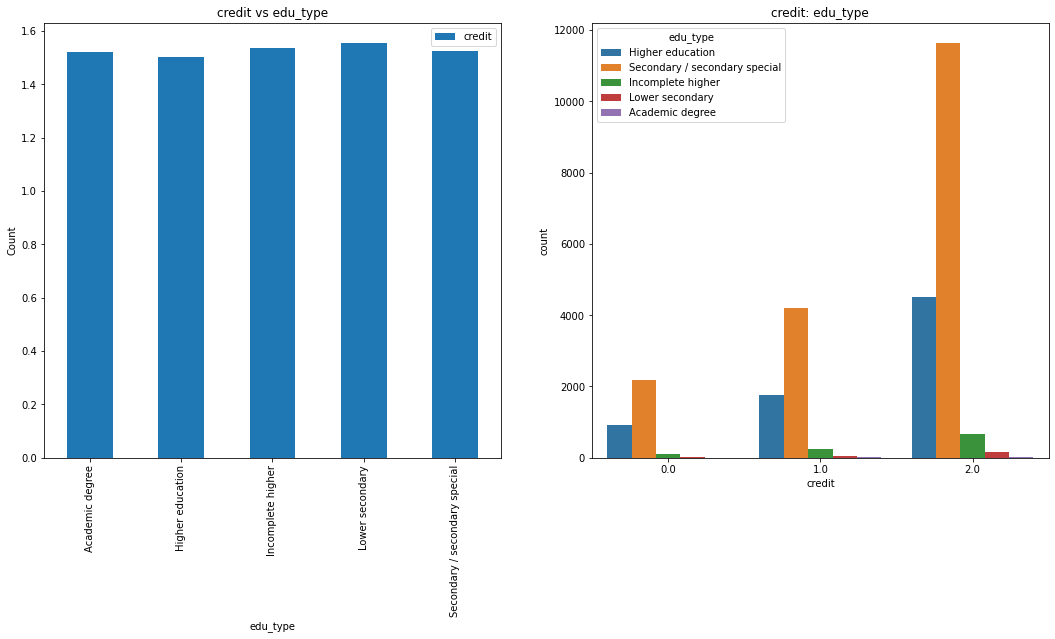

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['edu_type','credit']].groupby(['edu_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs edu_type')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='edu_type',data=train,ax=ax[1])
ax[1].set_title('credit: edu_type')
plt.show()

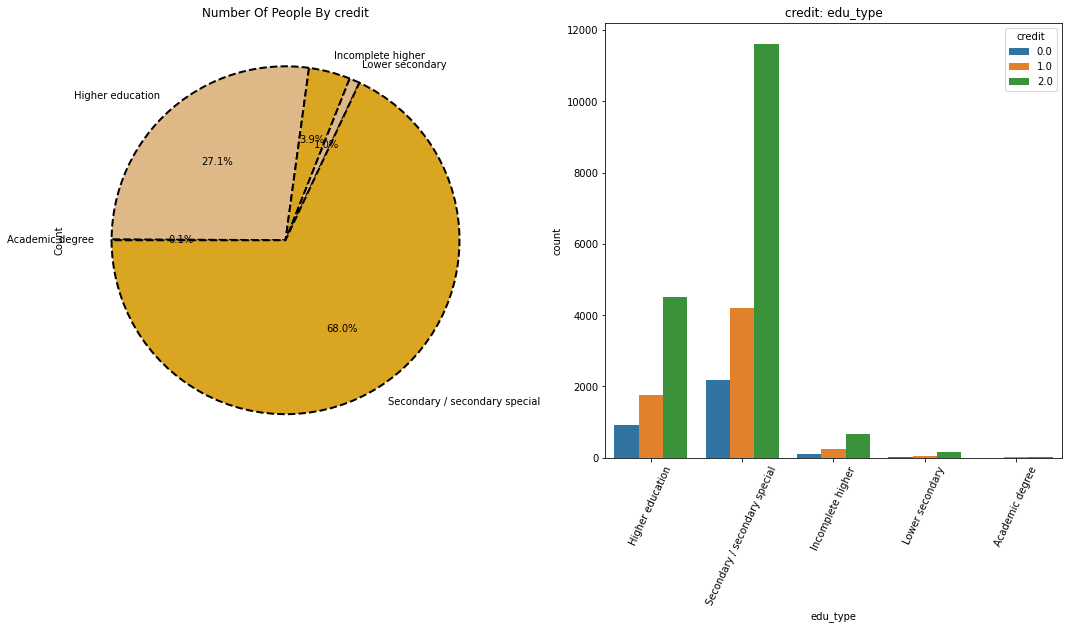

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
# train['edu_type'].value_counts().plot.bar(ax=ax[0])
df1= train.groupby('edu_type').count()['index']
f.set_facecolor('white')
ax[0].pie(df1, labels=df1.index,colors=['goldenrod','burlywood'], startangle=180,autopct='%1.1f%%',counterclock=False,wedgeprops = {'edgecolor':'k','linestyle':'--','linewidth':2})

ax[0].set_title('Number Of People By credit')
ax[0].set_ylabel('Count')
sns.countplot('edu_type',hue='credit',data=train,ax=ax[1])
ax[1].set_title('credit: edu_type')
plt.xticks(rotation=65)
plt.show()

- 가족 규모

In [ ]:
train.groupby(['family_size'])['credit'].count()

family_size
1.0      5109
2.0     14106
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
9.0         2
15.0        3
20.0        1
Name: credit, dtype: int64

In [ ]:
train.groupby(['family_size', 'credit'])['credit'].count()

family_size  credit
1.0          0.0        605
             1.0       1318
             2.0       3186
2.0          0.0       1720
             1.0       3249
             2.0       9137
3.0          0.0        610
             1.0       1088
             2.0       2934
4.0          0.0        251
             1.0        520
             2.0       1489
5.0          0.0         27
             1.0         74
             2.0        190
6.0          0.0          7
             1.0         12
             2.0         25
7.0          0.0          2
             1.0          6
             2.0          1
9.0          2.0          2
15.0         2.0          3
20.0         2.0          1
Name: credit, dtype: int64

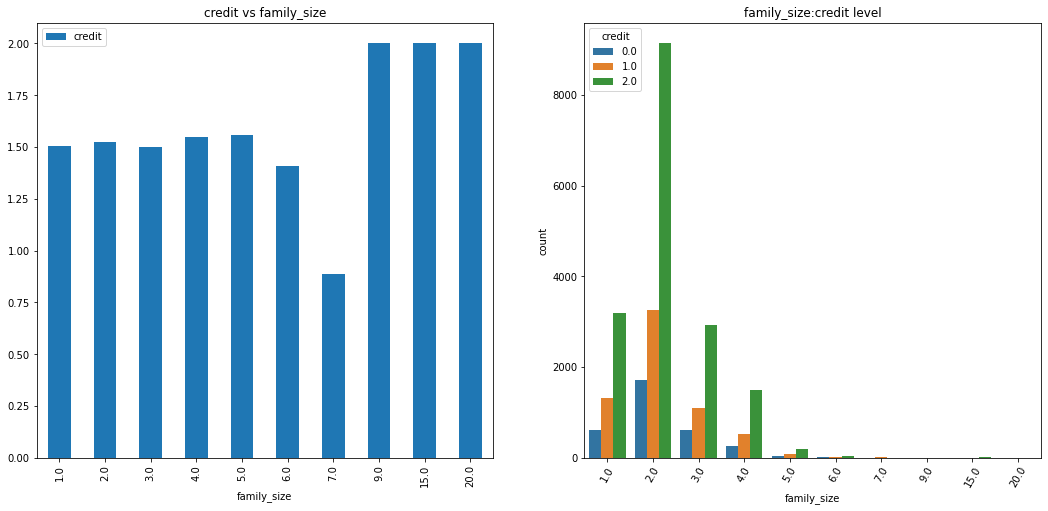

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['family_size','credit']].groupby(['family_size']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs family_size')
sns.countplot('family_size',hue='credit',data=train,ax=ax[1])
ax[1].set_title('family_size:credit level')
plt.xticks(rotation=60)
plt.show()

In [ ]:
pd.crosstab(train.credit,train.family_size,margins=True).style.background_gradient(cmap='summer_r')

family_size,1.0,2.0,3.0,4.0,5.0,6.0,7.0,9.0,15.0,20.0,All
credit,,,,,,,,,,,
0.0,605,1720,610,251,27,7,2,0,0,0,3222
1.0,1318,3249,1088,520,74,12,6,0,0,0,6267
2.0,3186,9137,2934,1489,190,25,1,2,3,1,16968
All,5109,14106,4632,2260,291,44,9,2,3,1,26457


7인 가구의 경우 수가 적어서 처리에 대한 고민을 해봐야 할 것 같습니다.

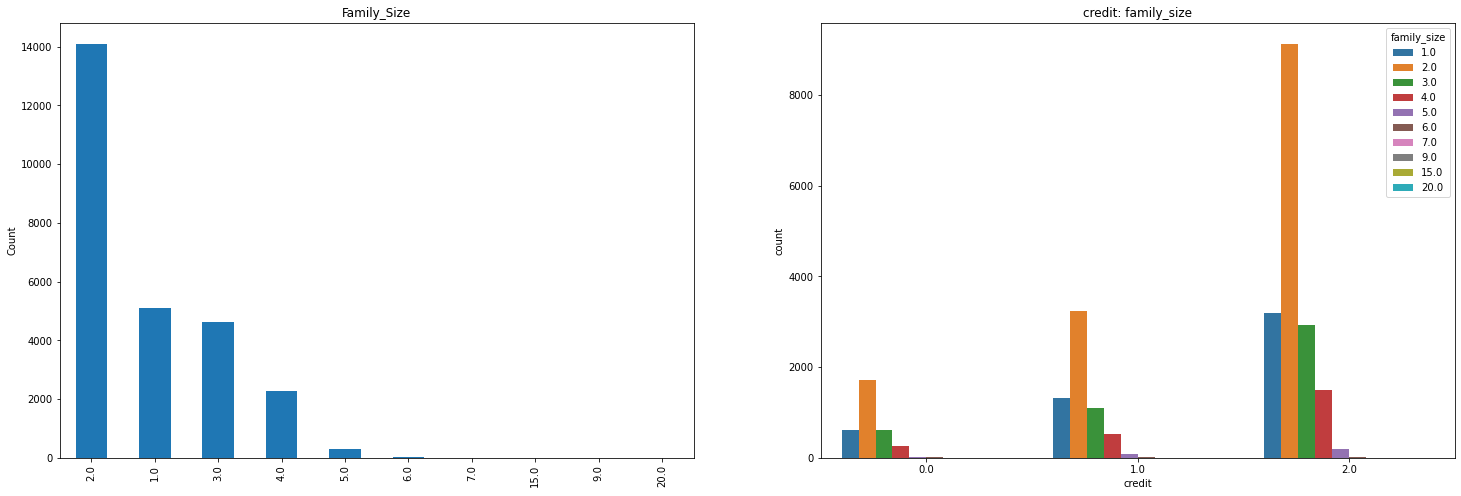

In [ ]:
f,ax=plt.subplots(1,2,figsize=(25,8))
train['family_size'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Family_Size')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='family_size',data=train,ax=ax[1])
ax[1].set_title('credit: family_size')
plt.show()

- 아이 숫자

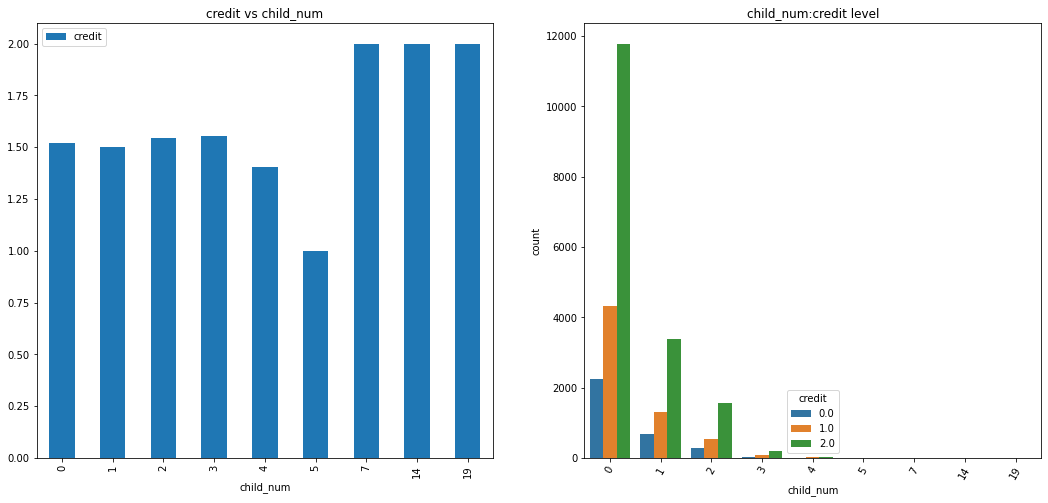

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['child_num','credit']].groupby(['child_num']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs child_num')
sns.countplot('child_num',hue='credit',data=train,ax=ax[1])
ax[1].set_title('child_num:credit level')
plt.xticks(rotation=60)
plt.show()

In [ ]:
pd.crosstab(train.credit,train.child_num,margins=True).style.background_gradient(cmap='summer_r')

child_num,0,1,2,3,4,5,7,14,19,All
credit,,,,,,,,,,
0.0,2233,682,268,29,8,2,0,0,0,3222
1.0,4322,1313,535,79,12,6,0,0,0,6267
2.0,11785,3391,1559,198,27,2,2,3,1,16968
All,18340,5386,2362,306,47,10,2,3,1,26457


가구원 수와 비교했을 때 일정 숫자를 뺀 분포와 비슷한 양상을 보입니다.

하지만 숫자가 낮은 경우 가족 구성 대한 고려를 섞어서 해봐야 할 것 같습니다.

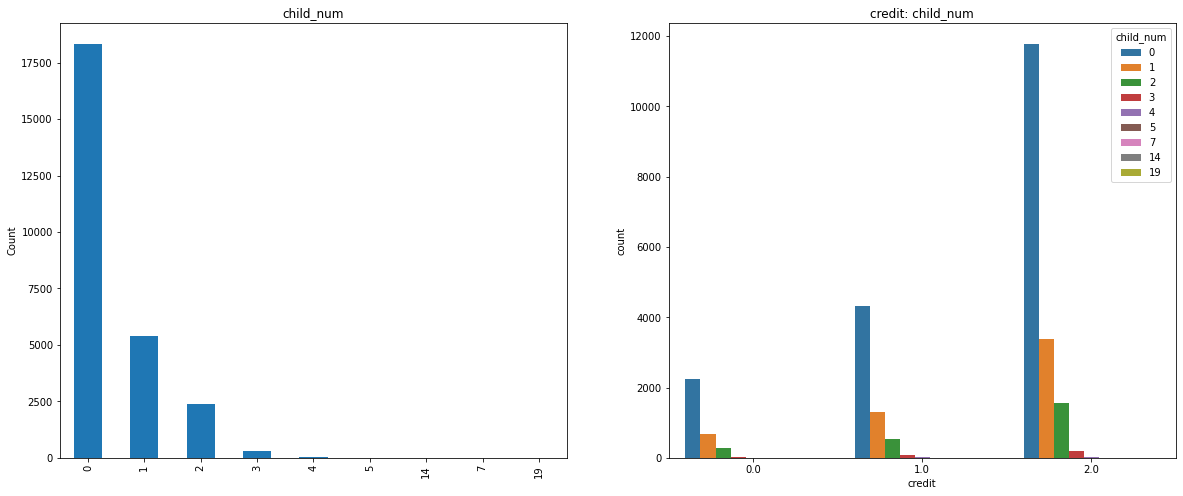

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
train['child_num'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('child_num')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='child_num',data=train,ax=ax[1])
ax[1].set_title('credit: child_num')
plt.show()

- 총소득, 나이, 직장 경력

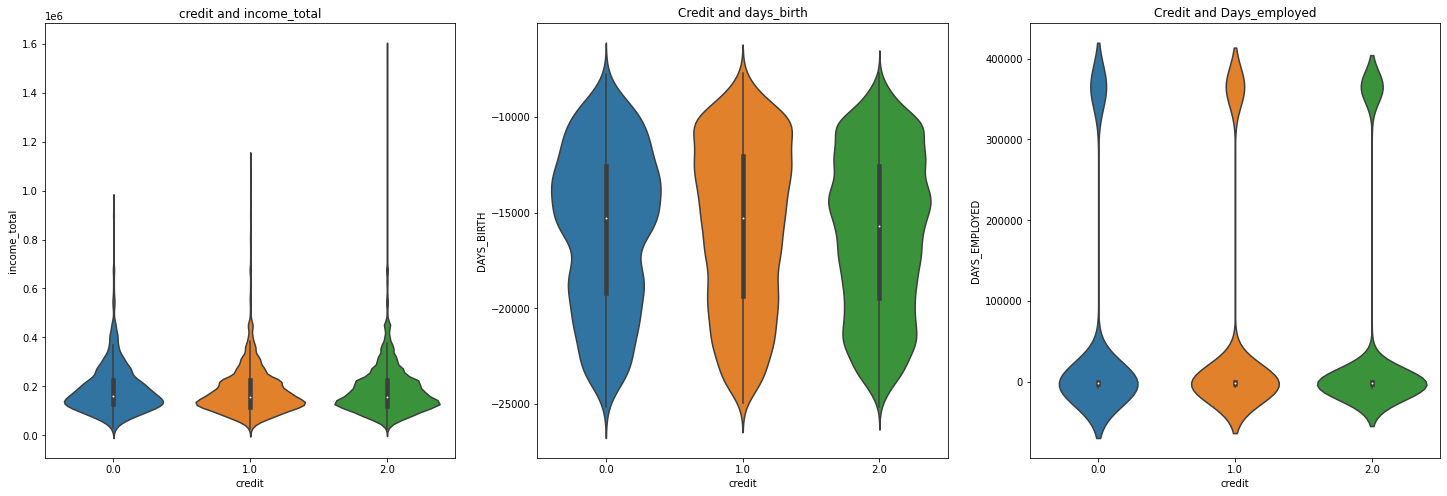

In [ ]:
f,ax=plt.subplots(1,3,figsize=(25,8))
sns.violinplot("credit","income_total", data=train,split=True,ax=ax[0])
ax[0].set_title('credit and income_total')
#ax[0].set_yticks(range(0,110,10))
sns.violinplot("credit","DAYS_BIRTH",  data=train,split=True,ax=ax[1])
ax[1].set_title('Credit and days_birth')
#ax[1].set_yticks(range(0,110,10))
sns.violinplot("credit","DAYS_EMPLOYED", data=train,split=True,ax=ax[2])
ax[2].set_title('Credit and Days_employed')
#ax[1].set_yticks(range(0,110,10))
plt.show()

이 부분은 데이터 전처리를 조금 해야할 것 같습니다.  

In [ ]:
train[train['DAYS_EMPLOYED']>=0] 

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,1,0,1,0,NaN,2.0,-7.0,2.0
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,1,0,1,0,NaN,1.0,-5.0,2.0
46,46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21100,365243,1,0,1,0,NaN,1.0,-24.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,26431,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21151,365243,1,0,0,1,NaN,1.0,-60.0,1.0
26432,26432,F,Y,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22314,365243,1,0,1,0,NaN,2.0,-17.0,1.0
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,1,0,0,0,NaN,2.0,-57.0,2.0
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1.0,-43.0,2.0


우선 직장 경력 36245를 모두 0으로 변경했습니다.

In [ ]:
train.loc[(train.DAYS_EMPLOYED)>=0,'DAYS_EMPLOYED'] = 0
test.loc[(test.DAYS_EMPLOYED)>=0,'DAYS_EMPLOYED'] = 0

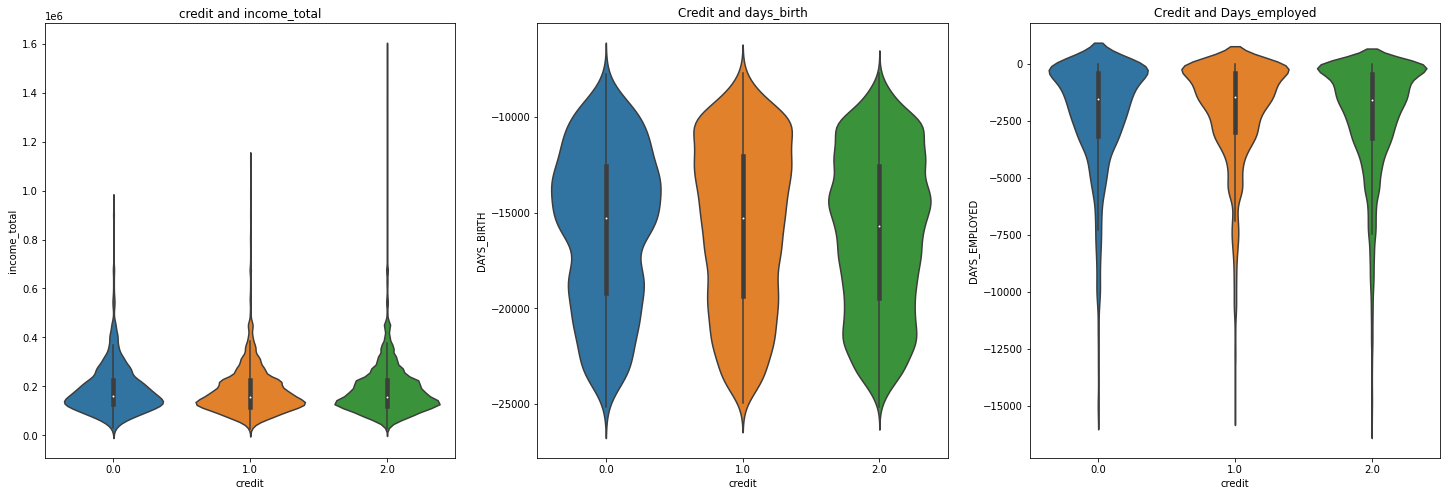

In [ ]:
f,ax=plt.subplots(1,3,figsize=(25,8))
sns.violinplot("credit","income_total", data=train,split=True,ax=ax[0])
ax[0].set_title('credit and income_total')
#ax[0].set_yticks(range(0,110,10))
sns.violinplot("credit","DAYS_BIRTH",  data=train,split=True,ax=ax[1])
ax[1].set_title('Credit and days_birth')
#ax[1].set_yticks(range(0,110,10))
sns.violinplot("credit","DAYS_EMPLOYED", data=train,split=True,ax=ax[2])
ax[2].set_title('Credit and Days_employed')
#ax[1].set_yticks(range(0,110,10))
plt.show()

## 전처리

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
train.drop(['phone', 'work_phone', 'email', 'occyp_type', 'FLAG_MOBIL'], axis =1,  inplace = True)

In [ ]:
test.drop(['phone', 'work_phone', 'email', 'occyp_type', 'FLAG_MOBIL'], axis =1,  inplace = True)

In [ ]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,-2198.529538,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,2370.140530,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,0.000000,20.000000,0.000000,2.000000


In [ ]:
train['child_num'].quantile(q=0.975)

2.0

In [ ]:
# 아이의 수가 3이상인 경우 이상치로 제거
train.drop(train.loc[train['child_num'] >= 3].index, inplace=True)
test.drop(test.loc[test['child_num'] >= 3].index, inplace=True)

In [ ]:
# 가족 수가 7이상인 경우 이상치로 제거
# train.drop(train.loc[train['family_size'] >= 3].index, inplace=True)
# test.drop(test.loc[test['family_size'] >= 3].index, inplace=True)

In [ ]:
train['child_num'].value_counts()

0    18340
1     5386
2     2362
Name: child_num, dtype: int64

In [ ]:
train.isna().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
family_size      0
begin_month      0
credit           0
dtype: int64

In [ ]:
test.isna().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
family_size      0
begin_month      0
dtype: int64

In [ ]:
train.drop('index', axis=1, inplace=True)

In [ ]:
test.drop('index', axis=1, inplace=True)

In [ ]:
train.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,credit
count,26088.000000,2.608800e+04,26088.000000,26088.000000,26088.000000,26088.000000,26088.000000
mean,0.387534,1.873670e+05,-15988.999502,-2194.942579,2.153519,-26.120592,1.519473
std,0.646875,1.018287e+05,4214.144872,2376.389786,0.832739,16.557938,0.702609
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.215000e+05,-19466.000000,-3143.000000,2.000000,-39.000000,1.000000
50%,0.000000,1.575000e+05,-15617.500000,-1534.000000,2.000000,-24.000000,2.000000
75%,1.000000,2.250000e+05,-12454.000000,-401.000000,3.000000,-12.000000,2.000000
max,2.000000,1.575000e+06,-7705.000000,0.000000,4.000000,0.000000,2.000000


In [ ]:
def make_bin(array, n):
    array = -array
    _, bin_dividers = np.histogram(array, bins = n)
    cut_categories = pd.cut(array, bin_dividers, labels = [i for i in range(n)], include_lowest=True)
    bined_array = pd.factorize(cut_categories)[0]
    return bined_array

for df in [train, test]:
    # before_EMPLOYED: 고용되기 전까지의 일수
    df['before_EMPLOYED'] = df['DAYS_BIRTH'] - df['DAYS_EMPLOYED'] # 고용이 일찍된 사람일수록 큰 값(음수)
    df['before_EMPLOYED_ct'] = make_bin(-df['before_EMPLOYED'], 10) # 범주화, 작을수록 신용도가 높을 것이라고 예상

    #DAYS_BIRTH 파생변수- Age(나이)
    df['Age'] = -df['DAYS_BIRTH'] // 365
    df['DAYS_BIRTH_ct'] = make_bin(df['DAYS_BIRTH'], 10) # 범주화

    #DAYS_EMPLOYED 파생변수- EMPLOYED(근속연수)
    df['EMPLOYED'] = -df['DAYS_EMPLOYED'] // 365
    df['DAYS_EMPLOYED_ct'] = make_bin(df['DAYS_EMPLOYED'], 10) # 범주화

    #ability: 소득/(살아온 일수 + 근무일수)
    df['ability'] = df['income_total'] / (df['DAYS_BIRTH'] + df['DAYS_EMPLOYED'])
    
    #income_mean: 소득/ 가족 수
    df['income_mean'] = df['income_total'] / df['family_size']

In [ ]:
binary_col = ['gender',
              'car',
              'reality']

binary_encoder = OrdinalEncoder(categories=[['F', 'M'],
                                            ['N', 'Y'],
                                            ['N', 'Y']],
                                dtype=np.int8)\
                              .fit(train.loc[:,binary_col])

train.loc[:,binary_col] = binary_encoder.transform(train.loc[:,binary_col])
test.loc[:,binary_col] = binary_encoder.transform(test.loc[:,binary_col])

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_feats = train.dtypes[train.dtypes == "object"].index.tolist()

le = LabelEncoder()
for feat in categorical_feats:
    train[feat] = le.fit_transform(train[feat])
    test[feat] = le.fit_transform(test[feat])

In [ ]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,credit,before_EMPLOYED,before_EMPLOYED_ct,Age,DAYS_BIRTH_ct,EMPLOYED,DAYS_EMPLOYED_ct,ability,income_mean
0,0,0,0,0,202500.0,0,1,1,2,-13899,-4709,2.0,-6.0,1.0,-9190,0,38,0,12,0,-10.882416,101250.0
1,0,0,1,1,247500.0,0,4,0,1,-11380,-1540,3.0,-5.0,1.0,-9840,0,31,0,4,1,-19.156347,82500.0
2,1,1,1,0,450000.0,4,1,1,1,-19087,-4434,2.0,-22.0,2.0,-14653,1,52,1,12,0,-19.131840,225000.0
3,0,0,1,0,202500.0,0,4,1,1,-15088,-2092,2.0,-37.0,0.0,-12996,2,41,2,5,1,-11.786962,101250.0
4,0,1,1,0,157500.0,2,1,1,1,-15037,-2105,2.0,-26.0,2.0,-12932,2,41,2,5,1,-9.187959,78750.0


In [ ]:
train.corr()[['credit']]

,credit
gender,0.000653
car,0.008601
reality,-0.009287
child_num,0.003300
income_total,0.008155
income_type,-0.007877
edu_type,0.011993
family_type,-0.005394
house_type,-0.009883
DAYS_BIRTH,-0.026155


In [ ]:
 # ID 생성: 각 컬럼의 값들을 더해서 고유한 사람을 파악
 # (*한 사람이 여러 개 카드를 만들 가능성을 고려해 begin_month는 제외함)

for df in [train, test]:
    df['ID'] = \
        df['child_num'].astype(str) + '_' + df['income_total'].astype(str) + '_' +\
        df['DAYS_BIRTH_ct'].astype(str) + '_' + df['DAYS_EMPLOYED_ct'].astype(str) + '_' +\
        df['family_size'].astype(str) + '_' + df['car'].astype(str) + '_' +\
        df['reality'].astype(str) + '_' + df['income_type'].astype(str) + '_' +\
        df['edu_type'].astype(str) + '_' + df['family_type'].astype(str) + '_' +\
        df['house_type'].astype(str) + '_' + df['before_EMPLOYED_ct'].astype(str)

In [ ]:
len(train['ID'].unique())

7629

In [ ]:
len(train['ID'])

26088

In [ ]:
# Log Encoding
for df in [train,test]:
    df['income_total'] = np.log1p(1+df['income_total'])

LE = LabelEncoder()

train['ID'] = LE.fit_transform(train['ID'])
train['ID'] = train['ID'].astype('int64')

test['ID'] = LE.fit_transform(test['ID'])
test['ID'] = test['ID'].astype('int64')

In [ ]:
train.corr()[['credit']]

,credit
gender,0.000653
car,0.008601
reality,-0.009287
child_num,0.003300
income_total,0.004496
income_type,-0.007877
edu_type,0.011993
family_type,-0.005394
house_type,-0.009883
DAYS_BIRTH,-0.026155


In [ ]:
train.to_csv('/content/mnt/MyDrive/Project/data/train_preprocessing.csv', index=False)
test.to_csv('/content/mnt/MyDrive/Project/data/test_preprocessing.csv', index=False)